## Principal Capstone: EDA


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
data = pd.read_csv("Full_Monthly.csv")
data = data.drop('Unnamed: 0',axis=1)
data['Date'] = pd.to_datetime(data['Date'])


## Quick look at the data

In [77]:
data.head()

,Date,Ticker,Sector,Industry,Cash From Operations,Current Market Cap,EBITDA Margin,Free Cash Flow,Gross Margin,Interest Expense,...,Yield.10.Yr.Vol.63,Yield.20.Yr.Vol.21,Yield.20.Yr.Vol.63,Yield.30.Yr.Vol.21,Yield.30.Yr.Vol.63,Total,OAS,Shiller.PE.Ratio,VIX.Value,VIX.VXV
0,1998-07-01,BAX,"Consumer, Non-cyclical",Healthcare-Products,146.000,15118.3532,25.5814,17.000,46.0888,39.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,72.402903,38.26,24.799999,NaN
1,1998-07-01,VOD,Communications,Telecommunications,NaN,256921.1418,NaN,NaN,NaN,NaN,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,78.340585,38.26,24.799999,NaN
2,1998-07-01,PXD,Energy,Oil&Gas,91.369,2398.8883,45.2357,-56.929,23.5375,41.017,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,147.188061,38.26,24.799999,NaN
3,1998-07-01,KMI,Energy,Pipelines,453.000,36519.0472,27.3650,-10.000,34.1947,297.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,113.533557,38.26,24.799999,NaN
4,1998-07-01,AZN,"Consumer, Non-cyclical",Pharmaceuticals,311.000,82119.0000,28.0482,-203.000,69.4947,33.000,...,0.100107,0.067771,0.117695,0.06957,0.126968,76.83215,60.176544,38.26,24.799999,NaN


In [90]:
#What type of data do we have?
pd.Series(data.Date.value_counts()).sort_values()

1999-08-01    114
1999-07-01    114
1999-09-01    114
1999-12-01    115
1998-10-01    115
1999-11-01    115
1998-12-01    115
1998-11-01    115
1999-10-01    115
2000-01-01    116
1998-08-01    116
1998-09-01    116
2000-03-01    116
2000-02-01    116
1998-07-01    116
1999-02-01    119
1999-05-01    119
2000-06-01    119
1999-04-01    119
2000-05-01    119
2000-04-01    119
1999-06-01    119
1999-03-01    119
1999-01-01    119
2004-07-01    123
2004-09-01    123
2004-08-01    123
2006-06-01    124
2004-11-01    124
2004-12-01    124
             ... 
2015-09-01    196
2015-07-01    196
2015-08-01    196
2016-06-01    197
2016-05-01    197
2016-04-01    197
2015-12-01    199
2015-11-01    199
2015-10-01    199
2016-07-01    200
2016-03-01    200
2016-08-01    200
2016-02-01    200
2016-01-01    200
2016-09-01    200
2016-12-01    202
2016-11-01    202
2016-10-01    202
2017-03-01    203
2017-01-01    203
2017-02-01    203
2017-04-01    204
2017-05-01    204
2017-06-01    204
2017-07-01

### How much data do we have for the tickers?

In [33]:
#Group by tickers, how much data do we have for our companies?
pd.Series(data.groupby("Ticker")['Date'].count()).sort_values().describe()
pd.Series(data.groupby("Ticker")['Date'].count()).sort_values().tail(20)

Ticker
AEP    234
ROK    234
EMR    234
PX     234
IBM    234
ETN    234
BRK    234
PG     234
PFE    234
PEG    234
EXC    234
OXY    234
FDX    234
BMY    234
NSC    234
NOC    234
NEM    234
GIS    234
CAT    234
PPL    234
Name: Date, dtype: int64

## What do some tickers OAS time series look like?

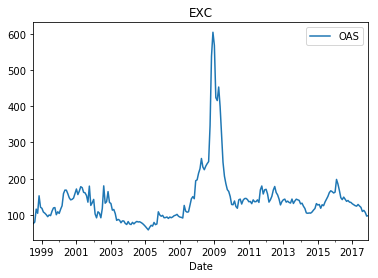

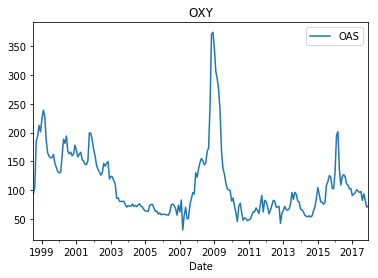

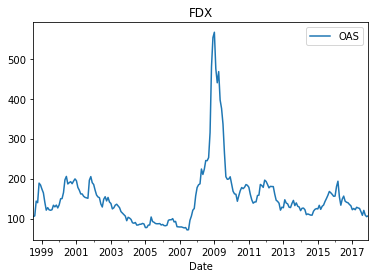

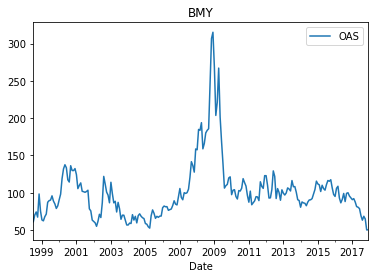

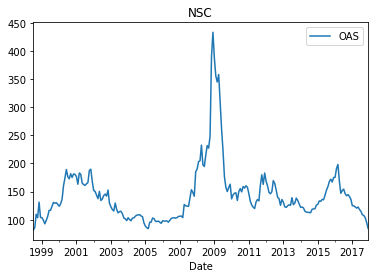

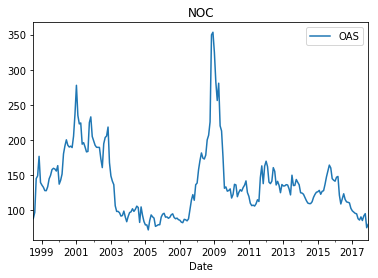

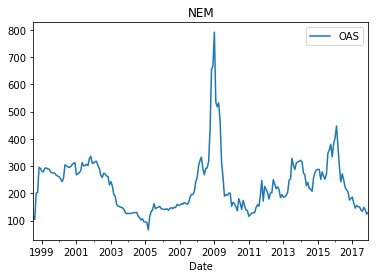

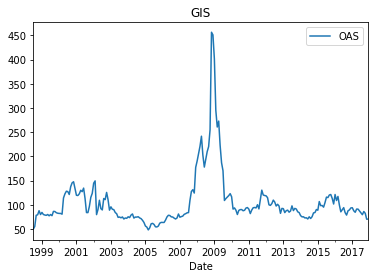

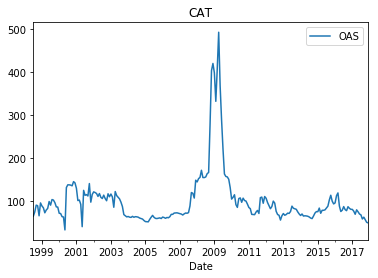

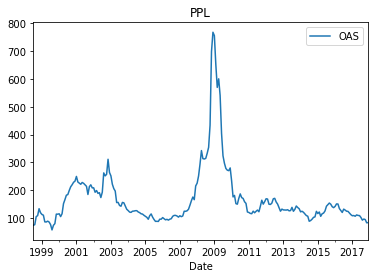

In [88]:
tickers = pd.Series(data.groupby("Ticker")['Date'].count()).sort_values().tail(10).reset_index()['Ticker']
for t in tickers:
    data[data.Ticker == t][['Date','OAS']].set_index('Date').plot(title=t)


#### Observations:
* Overall shapes are similar, same major spike
* No overall positive trend
* Some shocks persist throughout (2012) while some don't (2014 for NEM)


## Decompose Sample OAS series

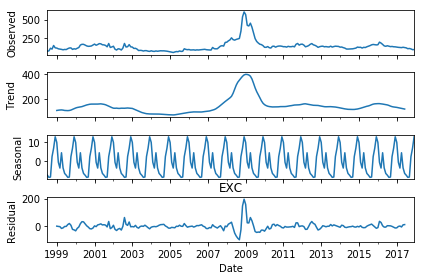

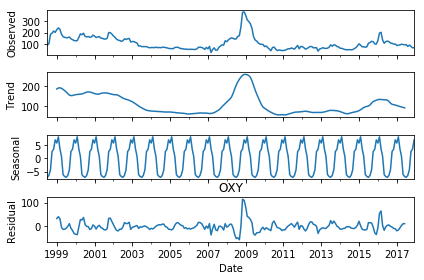

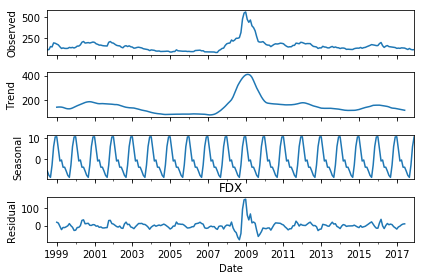

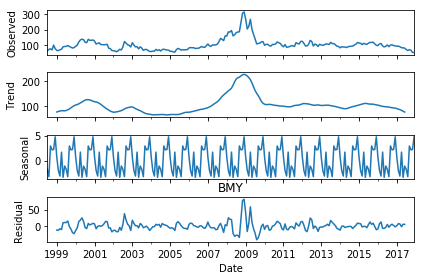

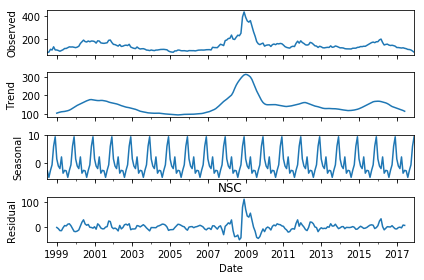

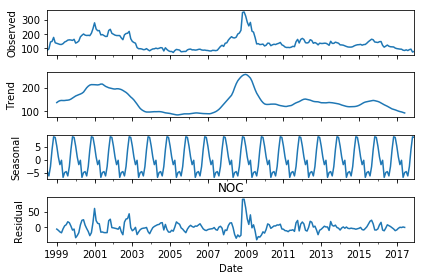

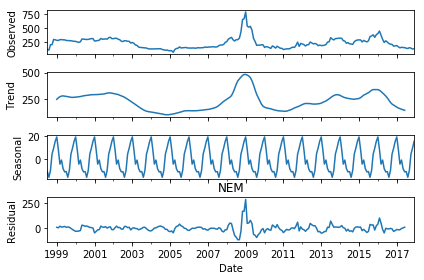

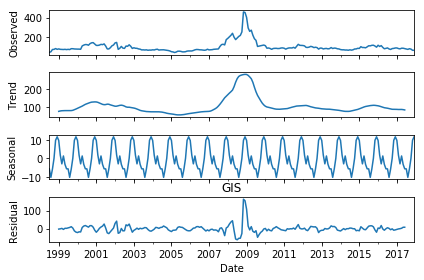

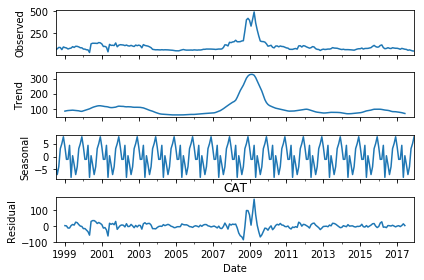

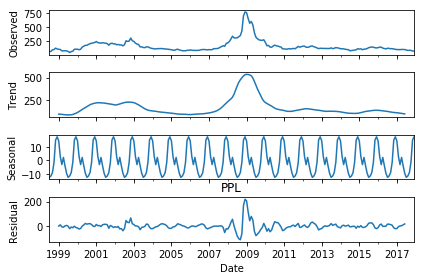

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

for t in tickers:
    decomp_data = data[data.Ticker == t][['Date','OAS']].set_index('Date')
    result = seasonal_decompose(decomp_data.OAS[0:], model='additive')
    result.plot()
    plt.title(t)

#### Observations:
* Some seasonal trends differ! (potentially due to industry?)
* Trend is fairly similar
